In [45]:
#==================================================
'''import the libraries'''

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

'''load the files'''

df = pd.read_excel("wine.xlsx")


'''檢查空值是否存在'''
df.isnull().sum()



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

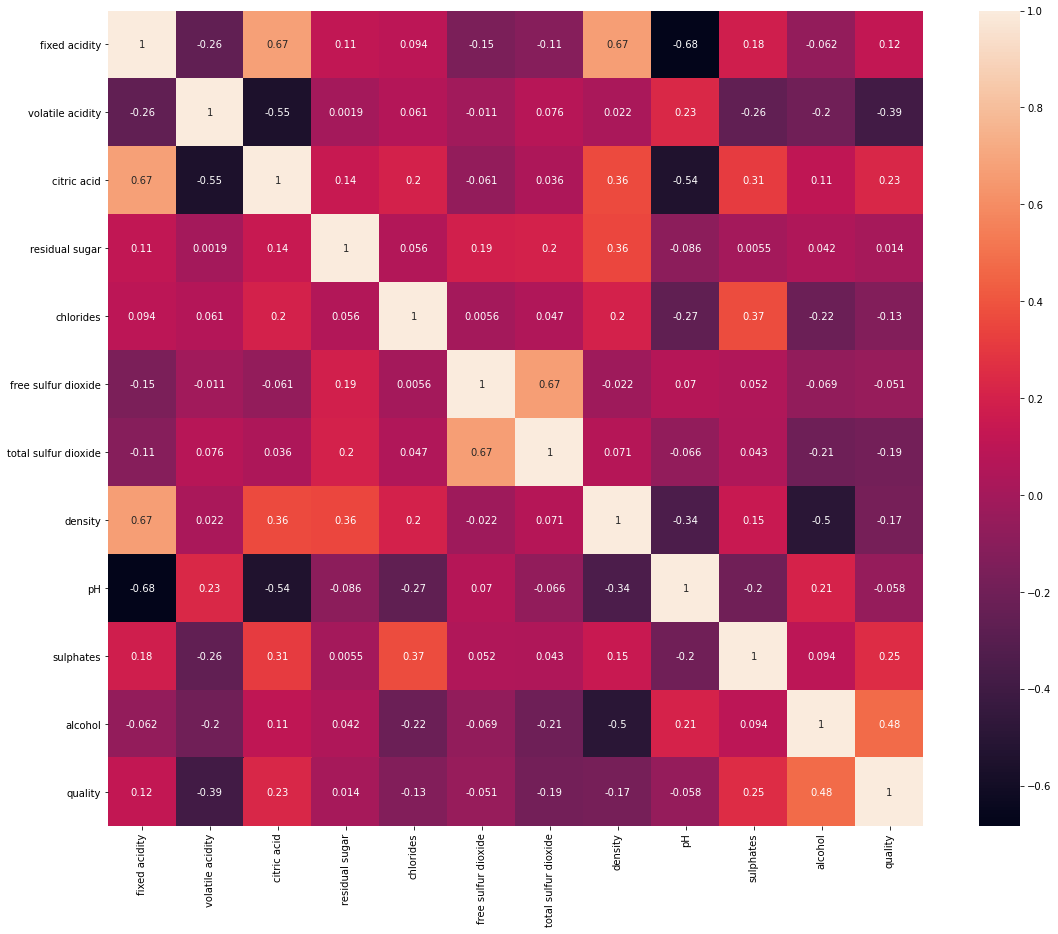

In [46]:
#==================================================

'''identify the correlation'''

plt.subplots(figsize=(20,15))

corr = df.corr()

sns.heatmap(corr,square=True, annot=True)


<AxesSubplot:>

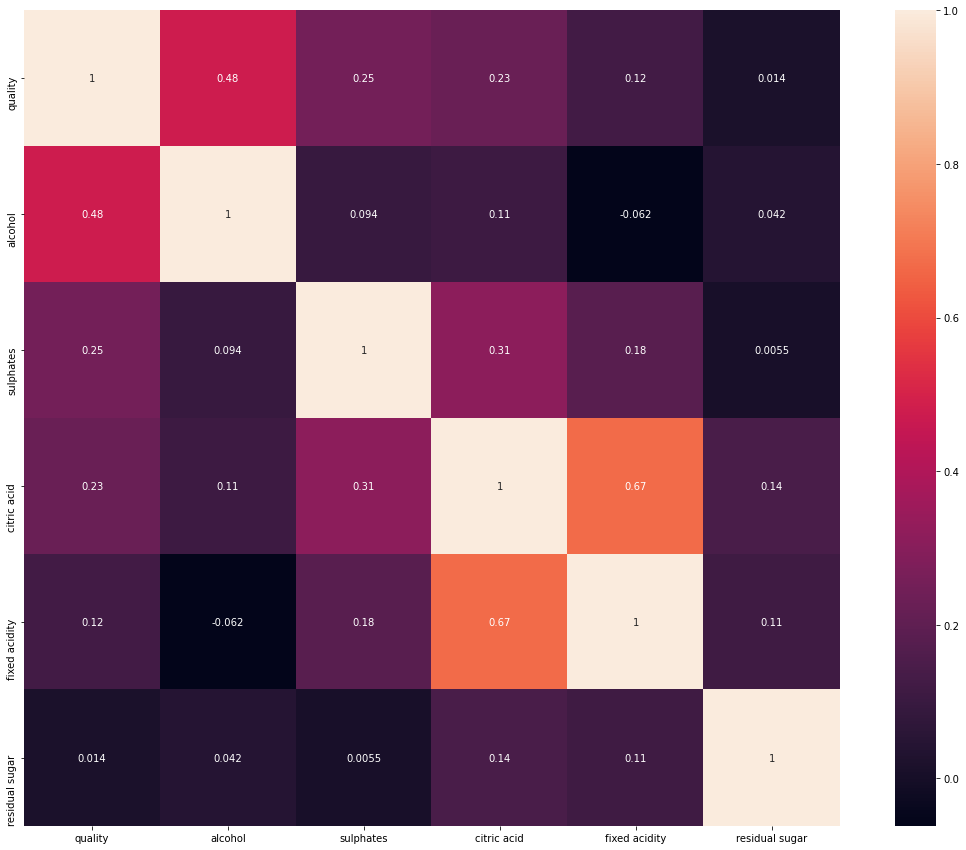

In [47]:
#==================================================

'''pick the top 6 highly correlating columns'''

cols = corr.nlargest(6, 'quality')['quality'].index

corrcoef = np.corrcoef(df[cols].values.T)

# correlation plotted against the top columns

plt.subplots(figsize=(20,15))

corr = df.corr()

sns.heatmap(corrcoef,square=True, annot=True, xticklabels= cols.values, yticklabels=cols.values)


In [48]:
#==================================================
'''使用机器学习中的sklearn库，将数据集拆分为测试和训练数据集，這裡使用了20％的数据作为测试数据集'''
y = df['quality']

X = df.drop('quality', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [49]:
#==================================================
'''由于不同的列具有不同的值，因此需要归一化值以获得准确的预测结果。这里使用StandardScaler库。也可以使用MinMaxScaler方法。'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [50]:
#==================================================
'''尝试各种算法，包括Logistic回归，决策树，随机森林，KNN和SVC。比較出更好的准确性'''

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression()

logreg.fit(X_train, y_train)

pred_logreg = logreg.predict(X_test)

accuracy = accuracy_score(pred_logreg, y_test)

print("Logreg Accuracy Score %.2f" % accuracy)




from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

accuracy = accuracy_score(pred_knn, y_test)

print("Knn Accuracy Score %.2f" % accuracy)





from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

pred_svc =svc.predict(X_test)

accuracy = accuracy_score(pred_svc, y_test)

print("SVC Accuracy Score %.2f" % accuracy)





from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

pred_tree =dtree.predict(X_test)

accuracy = accuracy_score(pred_tree, y_test)

print("DTree Accuracy Score %.2f" % accuracy)






from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

pred_rf =rf.predict(X_test)

accuracy = accuracy_score(pred_rf, y_test)

print("Random Forest Accuracy Score %.2f" % accuracy)

Logreg Accuracy Score 0.60
Knn Accuracy Score 0.65
SVC Accuracy Score 0.65
DTree Accuracy Score 0.60
Random Forest Accuracy Score 0.72
